In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [11]:
from sklearn.datasets import make_regression

In [13]:
n_samples=100   ##Number of samples
n_features=6    ##Number of features
n_informative=3 ##Number of informative features i.e. actual features which influence the output

In [20]:
x,y,coef= make_regression(n_samples=n_samples,n_features=n_features,n_informative=n_informative,random_state=None,shuffle=False,noise=20,coef=True)

In [24]:
df1=pd.DataFrame(data=x,columns=['X'+str(i) for i in range(1,n_features+1)])
df2=pd.DataFrame(data=y,columns=['y'])
df=pd.concat([df1,df2],axis=1)
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,-0.664072,0.286776,0.376032,0.961482,-1.362703,-0.654134,-14.182826
1,0.026627,-1.455223,1.214607,0.130251,0.437038,-0.450332,8.781472
2,0.592060,-0.004680,-2.017458,0.397495,1.635881,-0.189950,-46.718522
3,0.978590,0.115167,0.390713,1.476123,-0.183851,0.448282,88.858400
4,-0.725903,0.935614,-1.306087,0.457798,-0.948921,-2.476791,-35.050571
5,-1.674128,0.283434,-0.281116,-0.904609,-0.769105,0.567901,-153.910712
6,-0.755119,-1.723326,-1.255895,1.296902,-1.013422,-0.569500,-170.479994
7,-0.468338,1.295724,-2.123546,0.070455,-0.286923,0.476633,-62.296163
8,-0.413770,-0.486813,-1.199637,0.729579,-0.799505,1.143575,-92.228140
9,0.348427,-2.218475,-2.153927,-0.672427,-0.822442,-0.413520,-149.653389


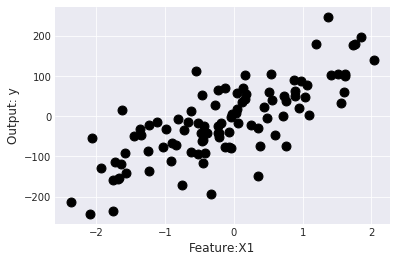

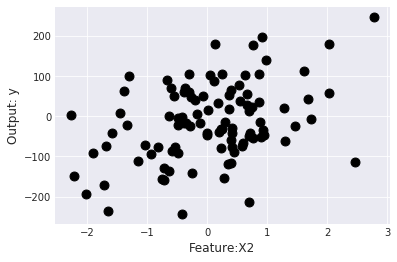

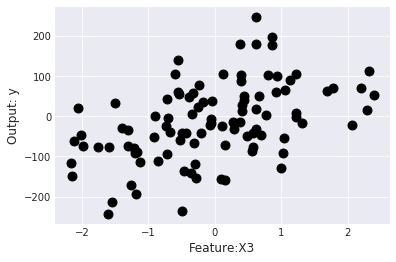

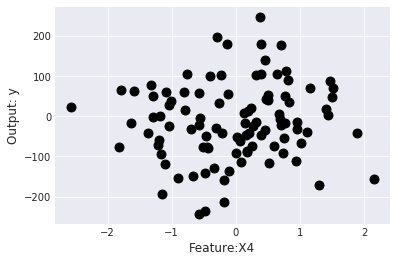

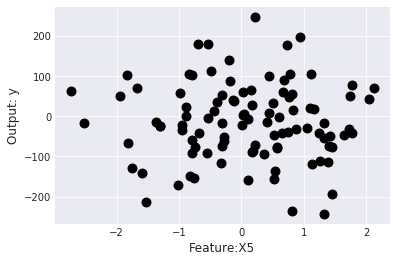

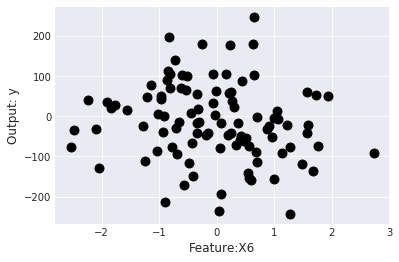

In [64]:
with plt.style.context(('seaborn-dark')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.scatter(df[col],df['y'],c='black',s=80,alpha=1)
        ### s for size od dotes alpha for darkness of colours 

In [27]:
df.head(10)

,X1,X2,X3,X4,X5,X6,y
0,-0.664072,0.286776,0.376032,0.961482,-1.362703,-0.654134,-14.182826
1,0.026627,-1.455223,1.214607,0.130251,0.437038,-0.450332,8.781472
2,0.592060,-0.004680,-2.017458,0.397495,1.635881,-0.189950,-46.718522
3,0.978590,0.115167,0.390713,1.476123,-0.183851,0.448282,88.858400
4,-0.725903,0.935614,-1.306087,0.457798,-0.948921,-2.476791,-35.050571
5,-1.674128,0.283434,-0.281116,-0.904609,-0.769105,0.567901,-153.910712
6,-0.755119,-1.723326,-1.255895,1.296902,-1.013422,-0.569500,-170.479994
7,-0.468338,1.295724,-2.123546,0.070455,-0.286923,0.476633,-62.296163
8,-0.413770,-0.486813,-1.199637,0.729579,-0.799505,1.143575,-92.228140
9,0.348427,-2.218475,-2.153927,-0.672427,-0.822442,-0.413520,-149.653389


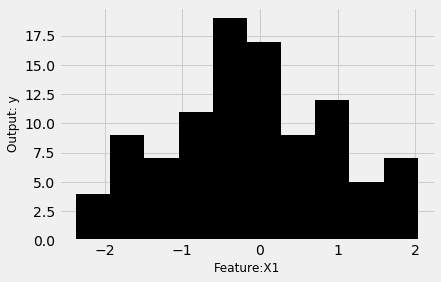

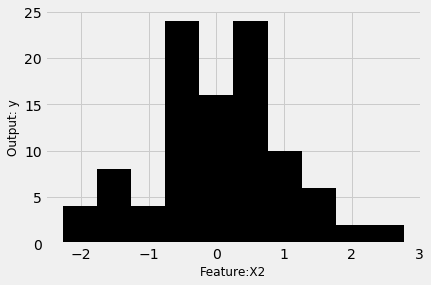

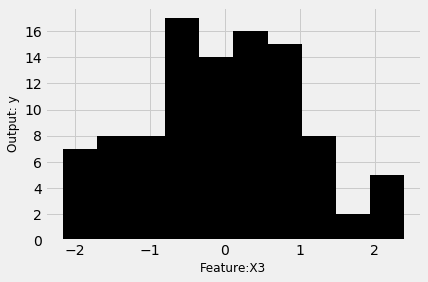

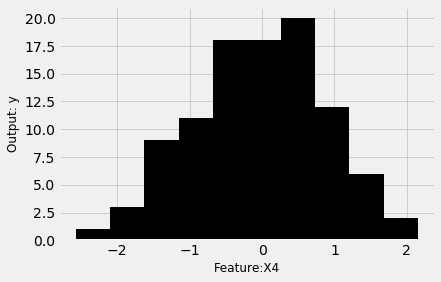

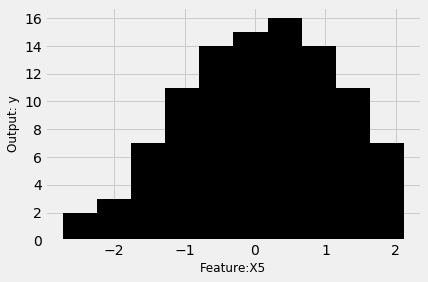

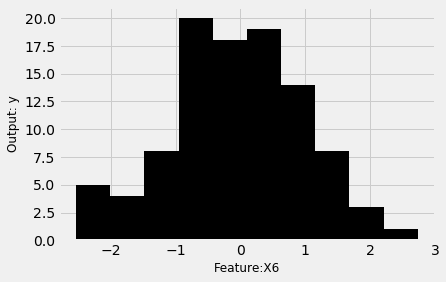

In [74]:
with plt.style.context(('fivethirtyeight')):
    for i,col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6,4))
        plt.grid(True)
        plt.xlabel('Feature:'+col,fontsize=12)
        plt.ylabel('Output: y',fontsize=12)
        plt.hist(df[col],alpha=1,facecolor='black')


In [32]:
from sklearn import tree

In [36]:
tree_model=tree.DecisionTreeRegressor(max_depth=5,random_state=None)
tree_model.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Relative importance of the features:  [0.6653351  0.09243987 0.19701737 0.01724125 0.01881016 0.00915624]


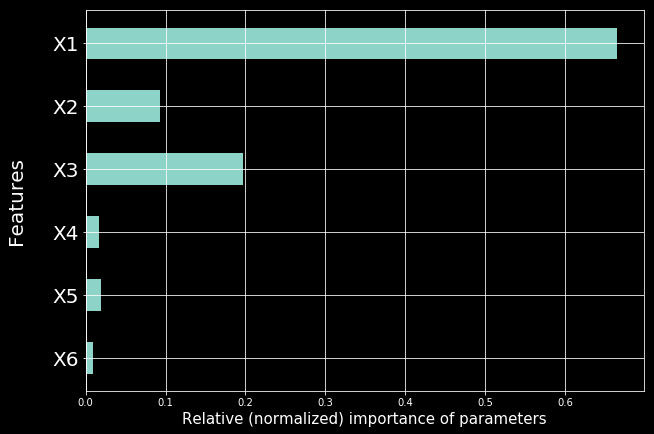

In [37]:
print("Relative importance of the features: ",tree_model.feature_importances_)
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,7))
    plt.grid(True)
    plt.yticks(range(n_features+1,1,-1),df.columns[:-1],fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters",fontsize=15)
    plt.ylabel("Features\n",fontsize=20)
    plt.barh(range(n_features+1,1,-1),width=tree_model.feature_importances_,height=0.5)

In [41]:
print("Regression coefficient:",tree_model.score(x,y))



Regression coefficient: 0.9480251222063721


In [42]:
from sklearn.ensemble import RandomForestRegressor


In [44]:
model = RandomForestRegressor(max_depth=5, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=100)
model.fit(x, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=5,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)